In [3]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy.stats as stats
import math
import sys

sys.path.append("./markdown.py")
import markdown as md

from matplotlib import style
from matplotlib.pyplot import figure
style.use('ggplot')
plt_height = 10
plt_length = 18

md_head = ['I[A]', 'U[V]', 'Time', 'R[Ω]']
md_fields = [0, 1, 2, 3]
md_align = [('>', '>'), ('>', '>'), ('>', '>'), ('>', '>')]

In [4]:

data = {
0: {
"I": [3.900, 5.010, 6.979, 7.599, 8.679, 10.23, 12.13, 13.70, 15.16],
"U": [6.530, 7.330, 8.919, 9.129, 9.699, 10.32, 11.38, 12.11, 12.49],
"t": ["11:10", "08:30", "05:52", "05:11", "04:20", "03:46", "03:09", "02:38", "02:31"]
}, 2: {
"I": [4.05, 5.57, 8.08, 11.19, 14.83, 16.70, 20.46, 23.52, 28.73, 33.76, 39.47, 47.50, 54.5, 67.3, 82.90],
"U": [3.82,3.92,4.12,4.30,4.54, 4.62, 4.97, 5.15,5.66, 5.87, 6.18, 6.58, 6.93, 7.53, 8.44],
"t": ["10:10", "08:12", "05:00" , "03:32", "02:30", "02:13", "01:48", "01:34", "01:17", "01:06", "00:56", "00:46", "00:42", "00:33", "00:27"]
}, 5: {
"I": [4.18, 5.07, 6.62, 8.40, 10.15, 12.47, 16.13, 19.15, 22.14, 25.09, 29.09, 34.68, 39.83, 45.80, 52.90, 61.80, 71.70, 82.20],
"U": [3.70, 3.75, 3.81, 3.87, 3.92, 3.99, 4.10, 4.16, 4.24, 4.31, 4.39, 4.52, 4.63, 4.76, 4.93, 5.09, 5.30, 5.51],
"t": ["13:42", "09:35", "06:22", "04:52", "04:00", "03:09", "02:22", "01:59", "01:44", "01:31", "01:17", "01:05", "00:56", "00:48", "00:41", "00:36", "00:30", "00:26"]
}, 10: {
"I": [4.35, 5.36, 6.63, 7.99, 10.38, 12.09, 14.02, 17.00, 20.79, 25.60, 30.30, 36.09, 41.60, 50.50, 61.7, 73.5],
"U": [3.47, 3.59, 3.67, 3.74, 3.81, 3.85, 3.91, 3.97, 4.06, 4.15, 4.23, 4.33, 4.42, 4.57, 4.74, 4.90],
"t": ["15:54", "09:59", "07:26", "05:48", "04:15", "03:32", "03:02", "02:25", "01:57", "01:34", "01:17", "01:04", "00:54", "00:44", "00:36", "00:28"]
}, 20: {
"I": [4.71, 5.46, 6.55, 7.85, 10.01, 12.07, 14.03, 17.13, 20.08, 23.15, 26.19, 30.09, 34.11, 39.85, 45.2, 50.3, 60.2, 69.9, 80.5],
"U": [2.99, 3.23, 3.44, 3.59, 3.69, 3.77, 3.82, 3.89, 3.95, 4.01, 4.06, 4.11, 4.18, 4.26,  4.34, 4.415, 4.55, 4.69, 4.83 ],
"t": ["17:28", "14:12", "11:07", "08:19", "05:58", "04:27", "03:36", "02:54", "02:18", "01:56", "01:41", "01:25", "01:12", "01:02", "00:53", "00:46", "00:38", "00:33", "00:28"]
}, 50: {
"I": [4.75, 5.45, 8.05, 9.95, 11.98, 14.00, 16.99, 20.02, 23.18, 25.99, 30.19, 34.07, 40.1, 45.2, 50.0, 60.3, 70.0, 82.1],
"U": [2.32, 2.53, 2.82, 3.00, 3.14, 3.35, 3.605, 3.74, 3.82, 3.89, 3.96, 4.04, 4.13, 4.20, 4.28, 4.42 , 4.54, 4.70],
"t": ["20:50", "17:20", "10:49", "07:51", "06:17", "05:10", "04:13", "03:15", "02:34", "02:11", "01:45", "01:30", "01:11", "01:03", "00:53", "00:42", "00:35", "00:28"]
}, 100: {
"I": [4.85, 5.54, 7.28, 8.80, 10.07, 12.12, 14.02, 17.10, 20.05, 23.01, 26.04, 30.10, 34.16, 40.1, 45.4, 50.4, 60.3, 69.7, 80.5],
"U": [2.25, 2.30, 2.40, 2.50, 2.59, 2.70, 2.82, 3.00, 3.16, 3.30, 3.47, 3.75, 3.86, 3.98, 4.09, 4.20, 4.33, 4.44, 4.59],
"t": ["14:30", "11:54", "09:06", "07:28", "06:21", "05:21", "04:35", "03:47", "03:12", "02:47", "02:28", "02:05", "01:48", "01:26", "01:15", "01:00", "00:46", "00:38", "00:31"]
}}

In [5]:
for key in data:
    tlen = len(data[key]["t"])
    data[key]["sec"] = np.zeros(tlen)

    for i in range(tlen):
        data[key]["sec"][i] = sum([a * b for a,b in zip([60,1], map(int,data[key]["t"][i].split(':')))])

    data[key]["R"] = [a / b for a, b in zip(data[key]["U"], data[key]["I"])]
    data[key]["P"] = [a * b for a, b in zip(data[key]["U"], data[key]["I"])]
    data[key]["W"] = [a * float(b) for a, b in zip(data[key]["P"], data[key]["sec"])]

In [6]:
legend = [""] * len(data)
i = 0
for key in data:
    legend[i] = "Stężenie ~" + str(key) + "‰"
    i += 1

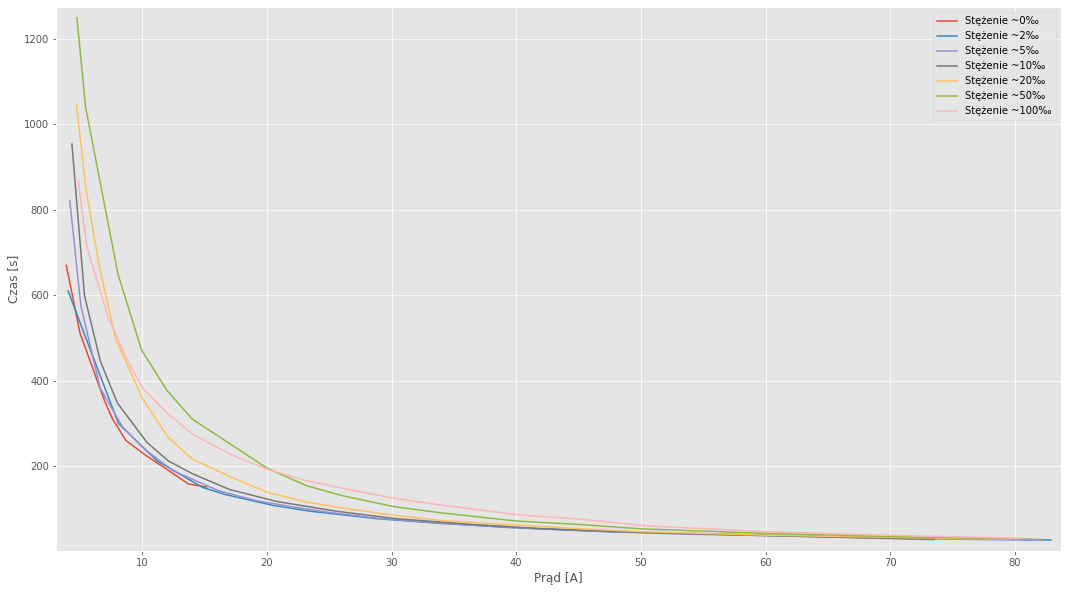

In [7]:
figure(1, figsize=(plt_length, plt_height))

for key in data:
    plt.plot(data[key]["I"], data[key]["sec"])

plt.xlabel("Prąd [A]")
plt.ylabel("Czas [s]")
plt.legend(legend)
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-time.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-time.pdf", bbox_inches = 'tight')
plt.show()

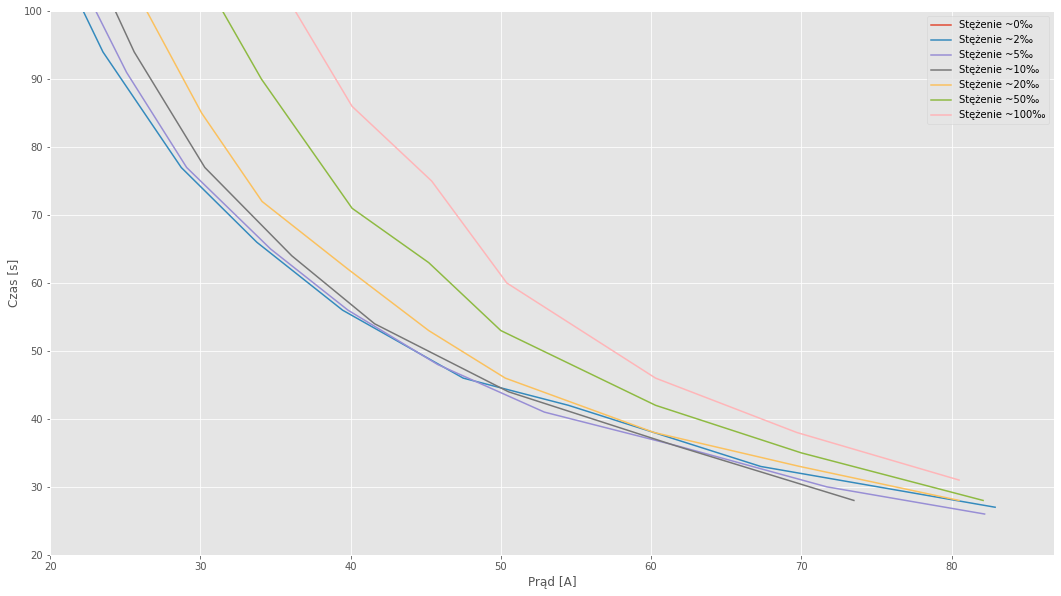

In [8]:
figure(1, figsize=(plt_length, plt_height))

for key in data:
    plt.plot(data[key]["I"], data[key]["sec"])

axes = plt.gca()
axes.set_ylim([20,100])
axes.set_xlim(left=20)
plt.xlabel("Prąd [A]")
plt.ylabel("Czas [s]")
plt.legend(legend)
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-time-ylim.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-time-ylim.pdf", bbox_inches = 'tight')
plt.show()

In [9]:
data2 = {
0: {
"I": [3.900, 5.010, 6.979, 7.599, 8.679, 10.23, 12.13, 13.70, 15.16],
"U": [6.530, 7.330, 8.919, 9.129, 9.699, 10.32, 11.38, 12.11, 12.49],
}, 2: {
"I": [4.05, 5.57, 8.08, 11.19, 14.83, 16.70, 20.46, 23.52, 28.73, 33.76, 39.47, 47.50, 54.5, 67.3, 82.90],
"U": [3.82,3.92,4.12,4.30,4.54, 4.62, 4.97, 5.15,5.66, 5.87, 6.18, 6.58, 6.93, 7.53, 8.44],
}, 5: {
"I": [0.08, 0.13, 0.20, 0.30, 0.50, 0.70, 0.90, 1.14, 1.49, 2.01, 2.93, 4.18, 5.07, 6.62, 8.40, 10.15, 12.47, 16.13, 19.15, 22.14, 25.09, 29.09, 34.68, 39.83, 45.80, 52.90, 61.80, 71.70, 82.20],
"U": [1.83, 1.88, 1.96, 2.04, 2.21, 2.36, 2.49, 2.54, 2.8, 3.06, 3.57, 3.70, 3.75, 3.81, 3.87, 3.92, 3.99, 4.10, 4.16, 4.24, 4.31, 4.39, 4.52, 4.63, 4.76, 4.93, 5.09, 5.30, 5.51],
}, 10: {
"I": [0.07, 0.10, 0.15, 0.20, 0.30, 0.50, 1.00, 1.51, 2.02, 2.55, 3.00, 3.51, 3.98, 4.35, 5.36, 6.63, 7.99, 10.38, 12.09, 14.02, 17.00, 20.79, 25.60, 30.30, 36.09, 41.60, 50.50, 61.7, 73.5],
"U": [1.70, 1.77, 1.82, 1.85, 1.91, 1.98, 2.13, 2.30, 2.43, 2.55, 2.67, 2.80, 2.94, 3.47, 3.59, 3.67, 3.74, 3.81, 3.85, 3.91, 3.97, 4.06, 4.15, 4.23, 4.33, 4.42, 4.57, 4.74, 4.90],
}, 20: {
"I": [0.07, 0.10, 0.15, 0.21, 0.31, 0.50, 0.76, 1.20, 1.49, 2.00, 2.49, 3.01, 3.49, 4.04, 4.55, 4.71, 5.46, 6.55, 7.85, 10.01, 12.07, 14.03, 17.13, 20.08, 23.15, 26.19, 30.09, 34.11, 39.85, 45.2, 50.3, 60.2, 69.9, 80.5],
"U": [1.33, 1.41, 1.48, 1.55, 1.66, 1.88, 1.99, 2.09, 2.14, 2.23, 2.31, 2.39, 2.47, 2.56, 2.64, 2.99, 3.23, 3.44, 3.59, 3.69, 3.77, 3.82, 3.89, 3.95, 4.01, 4.06, 4.11, 4.18, 4.26,  4.34, 4.415, 4.55, 4.69, 4.83],
}, 50: {
"I": [0.04, 0.10, 0.16, 0.20, 0.30, 0.50, 0.75, 1.01, 1.31, 1.61, 2.00, 2.52, 3.01, 3.54, 4.07, 4.50, 4.75, 5.45, 8.05, 9.95, 11.98, 14.00, 16.99, 20.02, 23.18, 25.99, 30.19, 34.07, 40.1, 45.2, 50.0, 60.3, 70.0, 82.1],
"U": [1.37, 1.44, 1.51, 1.56, 1.69, 1.82, 1.89, 1.93, 1.97, 2.00, 2.04, 2.085, 2.12, 2.17, 2.21, 2.225, 2.32, 2.53, 2.82, 3.00, 3.14, 3.35, 3.605, 3.74, 3.82, 3.89, 3.96, 4.04, 4.13, 4.20, 4.28, 4.42 , 4.54, 4.70],
}, 100: {
"I": [0.05, 0.10, 0.15, 0.20, 0.30, 0.50, 0.75, 1.01, 1.30, 1.60, 2.00, 2.50, 3.02, 3.53, 4.00, 4.54, 4.85, 5.54, 7.28, 8.80, 10.07, 12.12, 14.02, 17.10, 20.05, 23.01, 26.04, 30.10, 34.16, 40.1, 45.4, 50.4, 60.3, 69.7, 80.5],
"U": [1.43, 1.47, 1.52, 1.58, 1.70, 1.82, 1.87, 1.91, 1.95, 1.97, 2.01, 2.06, 2.10, 2.15, 2.18, 2.22, 2.25, 2.30, 2.40, 2.50, 2.59, 2.70, 2.82, 3.00, 3.16, 3.30, 3.47, 3.75, 3.86, 3.98, 4.09, 4.20, 4.33, 4.44, 4.59],
}}

In [10]:
for key in data2:
    data2[key]["R"] = [a / b for a, b in zip(data2[key]["U"], data2[key]["I"])]
    data2[key]["P"] = [a * b for a, b in zip(data2[key]["U"], data2[key]["I"])]

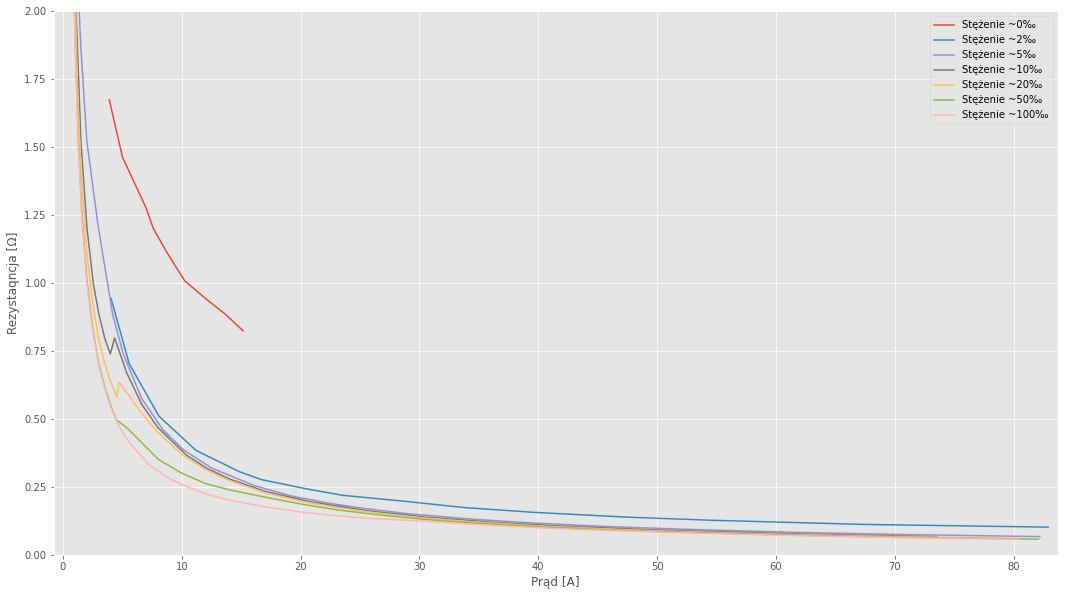

In [11]:
figure(1, figsize=(plt_length, plt_height))

for key in data2:
    plt.plot(data2[key]["I"], data2[key]["R"])

axes = plt.gca()
axes.set_ylim([0,2])
plt.xlabel("Prąd [A]")
plt.ylabel("Rezystaqncja [Ω]")
plt.legend(legend)
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-ohm.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-ohm.pdf", bbox_inches = 'tight')
plt.show()

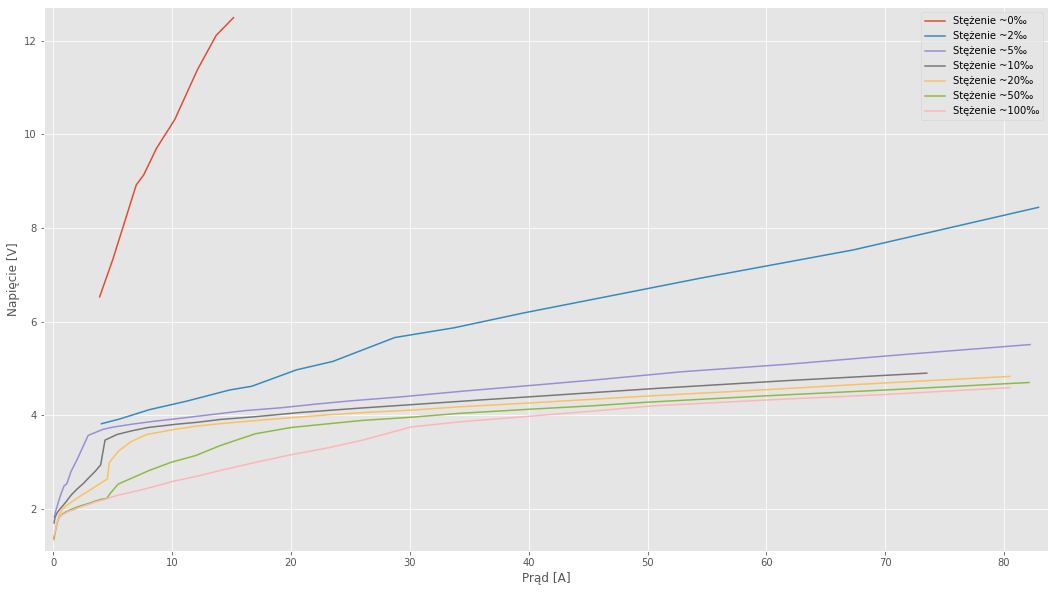

In [12]:
figure(1, figsize=(plt_length, plt_height))

for key in data2:
    plt.plot(data2[key]["I"], data2[key]["U"])
    
plt.xlabel("Prąd [A]")
plt.ylabel("Napięcie [V]")
plt.legend(legend)
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-volt.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-volt.pdf", bbox_inches = 'tight')
plt.show()

In [13]:
freq = [100, 1000, 10000, 100000, 200000]
koh = ["?", 0, 2, 5, 10, 20, 50, 100]
legend = [""] * len(koh)

for i in range(len(koh)):
    if(isinstance(koh[i], str)):
        legend[i] = koh[i]
    else:
        legend[i] = "~" + str(koh[i]) + "‰"

Z = [
    [0.030, 0.032, 0.313, 3.023, 5.98],
    [0.69, 0.68, 0.76, 2.51, 3.4],
    [0.121, 0.050, 0.287, 2.736, 5.491],
    [0.049, 0.034, 0.287, 2.773, 5.489],
    [0.032, 0.033, 0.305, 2.933, 5.800],
    [0.030, 0.030, 0.284, 2.734, 5.413],
    [0.026, 0.033, 0.313, 3.026, 5.993],
    [0.031, 0.030, 0.291, 2.798, 5.539]
]

Fi = [
    [-56.3, 64.6, 85.90, 88.67, 88.86],
    [-4.821, 1.688, 20.45, 39.91, 26.64],
    [-10.44, 29.93, 79.99, 87.96, 88.49],
    [-40.01, 41.91, 83.83, 88.39, 88.69],
    [-46.74, 57.12, 85.01, 88.41, 88.67],
    [-54.87, 56.99, 85.13, 88.55, 88.79],
    [-47.89, 63.95, 85.71, 88.58, 88.88],
    [-55.55, 61.95, 85.46, 88.56, 88.75]
]

Ls = [
    [-39.6, 4.66, 4.97, 4.81, 4.764],
    [-94, 3.22, 4.2, 2.56, 1.217],
    [-48.12, 3.946, 4.5, 4.352, 4.308],
    [-50.28, 3.628, 4.559, 4.411, 4.365],
    [-37.99, 4.493, 4.842, 4.666, 4.615],
    [-45.72, 4.032, 4.495, 4.345, 4.306],
    [-31.27, 4.738, 4.976, 4.815, 4.767],
    [-40.85, 4.285, 4.615, 4.453, 4.406]
]

ESR = [
    [0.0166, 0.0138, 0.0701, 0.119, 0.12],
    [0.69, 0.69, 0.71, 1.92, 3.05],
    [0.0512, 0.0437, 0.0506, 0.0973, 0.1446],
    [0.0382, 0.0254, 0.0309, 0.077, 0.126],
    [0.0223, 0.0181, 0.0265, 0.0806, 0.1356],
    [0.0216, 0.0165, 0.0245, 0.0684, 0.1139],
    [0.0177, 0.0145, 0.0234, 0.0745, 0.1173],
    [0.0176, 0.0143, 0.0229, 0.0699, 0.1204]
]

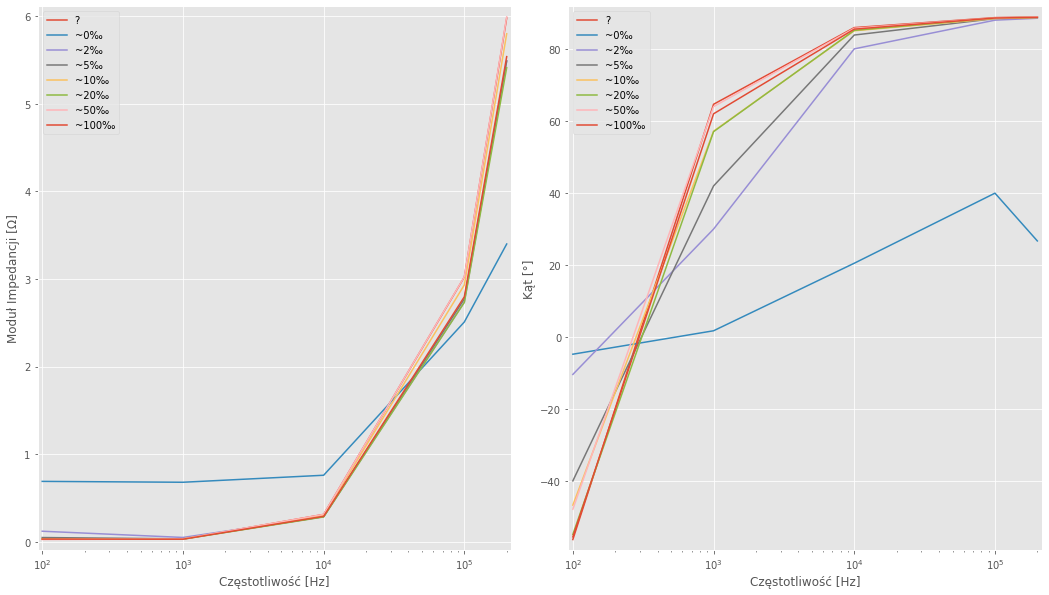

In [14]:
figure, ch = plt.subplots(1, 2)
figure.set_figheight(plt_height)
figure.set_figwidth(plt_length)
figure.subplots_adjust(wspace = 0.12, hspace = 0.15) 

for i in range(len(koh)):
    ch[0].plot(freq, Z[i])
    ch[1].plot(freq, Fi[i])
    
ch[0].set_xlabel("Częstotliwość [Hz]")
ch[0].set_ylabel("Moduł Impedancji [Ω]")
ch[0].legend(legend)
ch[0].margins(0.01, 0.02)
ch[0].set_xscale('log')

ch[1].set_xlabel("Częstotliwość [Hz]")
ch[1].set_ylabel("Kąt [°]")
ch[1].legend(legend)
ch[1].margins(0.01, 0.02)
ch[1].set_xscale('log')

plt.savefig("./png/eclz-rlc-zfi.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-rlc-zfi.pdf", bbox_inches = 'tight')
plt.show()

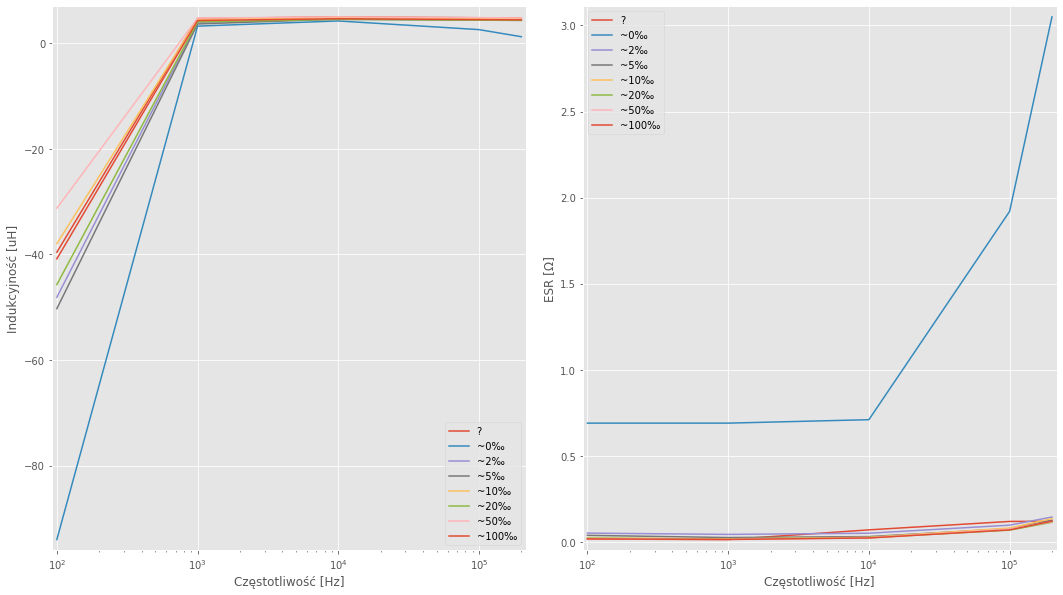

In [15]:
figure, ch = plt.subplots(1, 2)
figure.set_figheight(plt_height)
figure.set_figwidth(plt_length)
figure.subplots_adjust(wspace = 0.12, hspace = 0.15) 

for i in range(len(koh)):
    ch[0].plot(freq, Ls[i])
    ch[1].plot(freq, ESR[i])
    
ch[0].set_xlabel("Częstotliwość [Hz]")
ch[0].set_ylabel("Indukcyjność [uH]")
ch[0].legend(legend)
ch[0].margins(0.01, 0.02)
ch[0].set_xscale('log')

ch[1].set_xlabel("Częstotliwość [Hz]")
ch[1].set_ylabel("ESR [Ω]")
ch[1].legend(legend)
ch[1].margins(0.01, 0.02)
ch[1].set_xscale('log')

plt.savefig("./png/eclz-rlc-lsesr.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-rlc-lsesr.pdf", bbox_inches = 'tight')
plt.show()

In [16]:
dataX = [2, 5, 10, 20, 50, 100]

dataY = {
10: {
"U": [4.2, 3.92, 3.81, 3.69, 3.00, 2.59],
"t": ["03:34", "04:00", "04:15", "05:58", "07:51", "06:21"]
}, 20: {
"U": [4.97, 4.17, 4.06, 3.95, 3.74, 3.16],
"t": ["01:48", "01:57", "01:57", "02:18", "03:15", "03:12"]
}, 30: {
"U": [5.76, 4.40, 4.23, 4.11, 3.96, 3.75],
"t": ["01:12", "01:16", "01:17",  "01:25", "01:45", "02:05"]
}, 40: {
"U": [6.20, 4.63, 4.42, 4.26, 4.13, 3.98],
"t": ["00:56", "00:54", "00:56", "00:54", "01:02", "01:26"]
}, 50: {
"U": [6.78, 4.91, 4.57, 4.415, 4.28, 4.20],
"t": ["00:44", "00:42", "00:44", "00:46", "00:53", "01:00"]
}, 60: {
"U": [7.23, 5.04, 4.74, 4.55, 4.42, 4.33],
"t": ["00:32", "00:37", "00:36", "00:38", "00:42", "00:46"]
}, 70: {
"U": [7.73, 5.25, 4.86, 4.69, 4.54, 4.44],
"t": ["00:27", "00:31", "00:29", "00:33", "00:35", "00:38"]
}}

legend = [""] * len(dataY)
i = 0
for key in dataY:
    legend[i] = "Prąd " + str(key) + "A"
    i += 1

In [17]:
for key in dataY:
    tlen = len(dataY[key]["t"])
    dataY[key]["sec"] = np.zeros(tlen)

    for i in range(tlen):
        dataY[key]["sec"][i] = sum([a * b for a,b in zip([60,1], map(int,dataY[key]["t"][i].split(':')))])

    dataY[key]["P"] = [key * a for a in dataY[key]["U"]]
    print(dataY[key]["P"])

[42.0, 39.2, 38.1, 36.9, 30.0, 25.9]
[99.39999999999999, 83.4, 81.19999999999999, 79.0, 74.80000000000001, 63.2]
[172.79999999999998, 132.0, 126.9, 123.30000000000001, 118.8, 112.5]
[248.0, 185.2, 176.8, 170.39999999999998, 165.2, 159.2]
[339.0, 245.5, 228.5, 220.75, 214.0, 210.0]
[433.8, 302.4, 284.40000000000003, 273.0, 265.2, 259.8]
[541.1, 367.5, 340.20000000000005, 328.3, 317.8, 310.8]


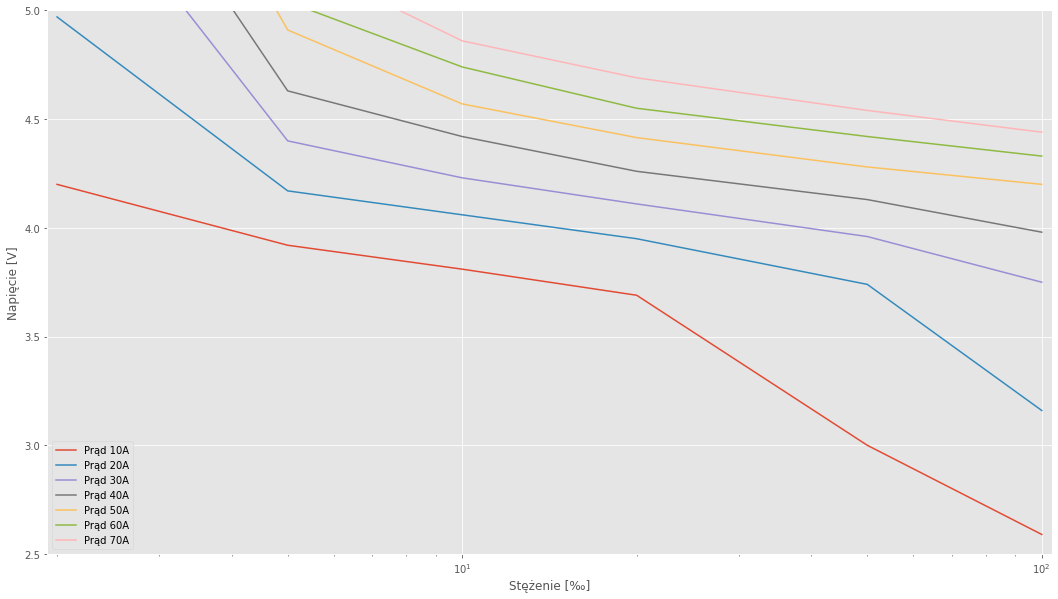

In [18]:
plt.figure(1, figsize=(plt_length, plt_height))

for key in dataY:
    plt.plot(dataX, dataY[key]["U"])

axes = plt.gca()
axes.set_ylim([2.5,5])
axes.set_xscale('log')
plt.xlabel("Stężenie [‰]")
plt.ylabel("Napięcie [V]")
plt.legend(legend)
plt.margins(0.01, 0.02)

plt.savefig("./png/eclz-static-concentration-volt.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-concentration-volt.pdf", bbox_inches = 'tight')
plt.show()

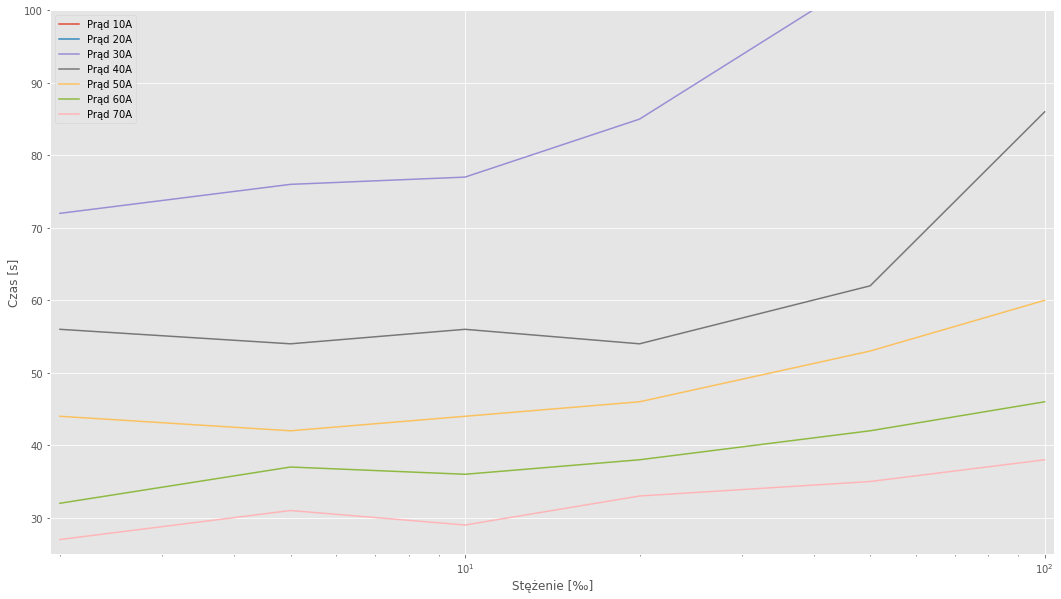

In [20]:
plt.figure(1, figsize=(plt_length, plt_height))

for key in dataY:
    plt.plot(dataX, dataY[key]["sec"])

axes = plt.gca()
axes.set_ylim([25,100])
axes.set_xscale('log')
plt.xlabel("Stężenie [‰]")
plt.ylabel("Czas [s]")
plt.legend(legend)
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-concentration-time.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-concentration-time.pdf", bbox_inches = 'tight')
plt.show()

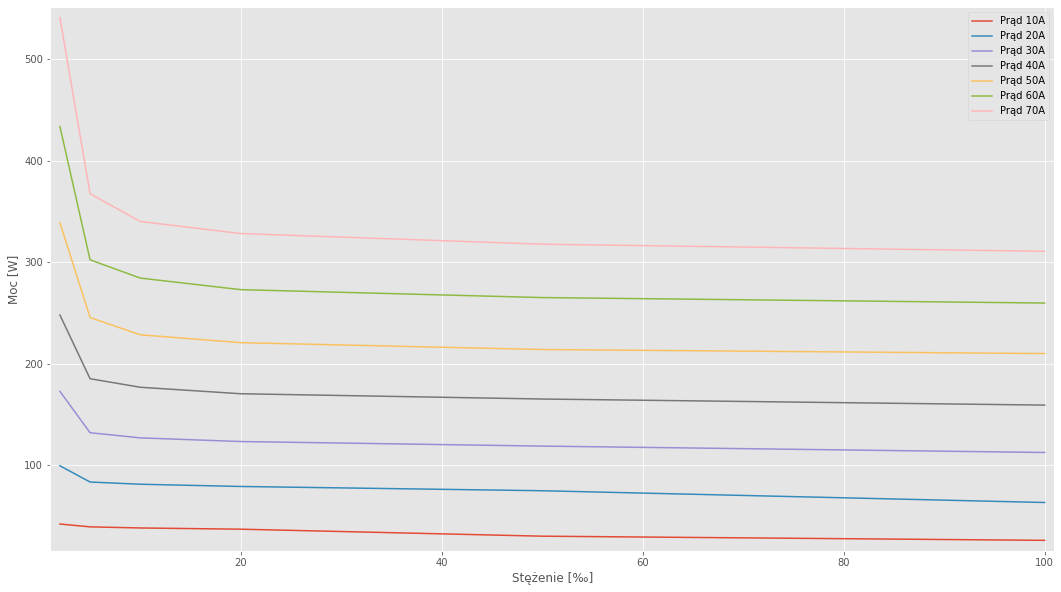

In [22]:
plt.figure(1, figsize=(plt_length, plt_height))

for key in dataY:
    plt.plot(dataX, dataY[key]["P"])

#axes = plt.gca()
#axes.set_ylim([25,100])
#axes.set_xscale('log')
plt.xlabel("Stężenie [‰]")
plt.ylabel("Moc [W]")
plt.legend(legend)
plt.margins(0.01, 0.02)
plt.savefig("./png/eclz-static-concentration-power.png", bbox_inches = 'tight')
plt.savefig("./pdf/eclz-static-concentration-power.pdf", bbox_inches = 'tight')
plt.show()